In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
results_df = pd.read_csv('results/2022-10-13-15-55-34.csv')

results_df.head()

,Step,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,10.000000,100,4,200.00000,0.499653,4.784925
1,10,9.508267,100,4,189.50360,0.387683,1.585437
2,20,9.119352,100,4,168.40340,0.477466,1.224614
3,30,8.871136,100,4,133.23040,0.422916,1.357964
4,40,8.774244,100,4,83.13219,0.308002,1.399594


In [42]:
def combine_axis_in_legend(axs, ax_to_legend):
    hanbdles =[]
    labels = []
    for ax_1 in axs:
        handle, label = ax_1.get_legend_handles_labels()
        hanbdles.extend(handle)
        labels.extend(label)
    ax_to_legend.legend(hanbdles, labels, loc=0)

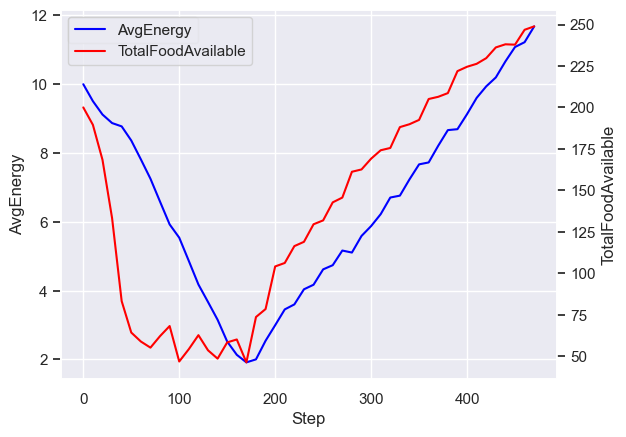

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='AvgEnergy', label='AvgEnergy', color='blue', ax=ax)
ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='TotalFoodAvailable', label='TotalFoodAvailable', ax=ax2, color='red')
combine_axis_in_legend([ax, ax2], ax2)

<AxesSubplot: xlabel='Step', ylabel='NoBoids'>

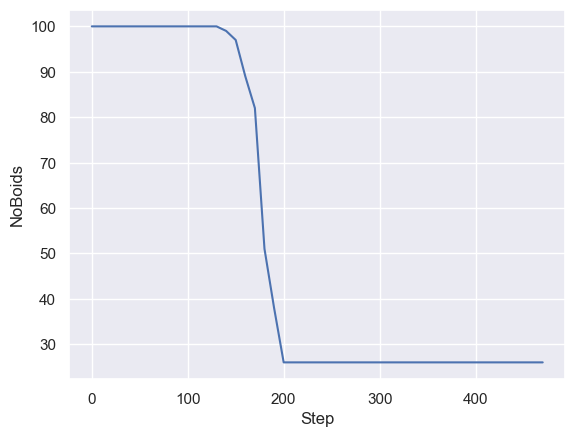

In [4]:
sns.lineplot(data=results_df, x='Step', y='NoBoids')

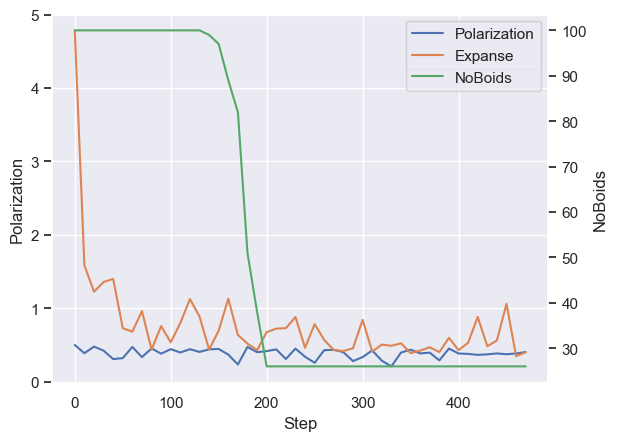

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='Polarization', label='Polarization', ax=ax)
sns.lineplot(data=results_df, x='Step', y='Expanse', label='Expanse', ax=ax)

ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='NoBoids', color="g", label='NoBoids', ax=ax2)

combine_axis_in_legend([ax, ax2], ax2)
